In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [ ]:
train_path = "C:/Users/91938/OneDrive/Desktop/DataSet/tomato/train"
valid_path = "C:/Users/91938/OneDrive/Desktop/DataSet/tomato/val"

In [ ]:
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1000 images belonging to 10 classes.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return

    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return

    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))

    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)

    plt.tight_layout()
    plt.show()

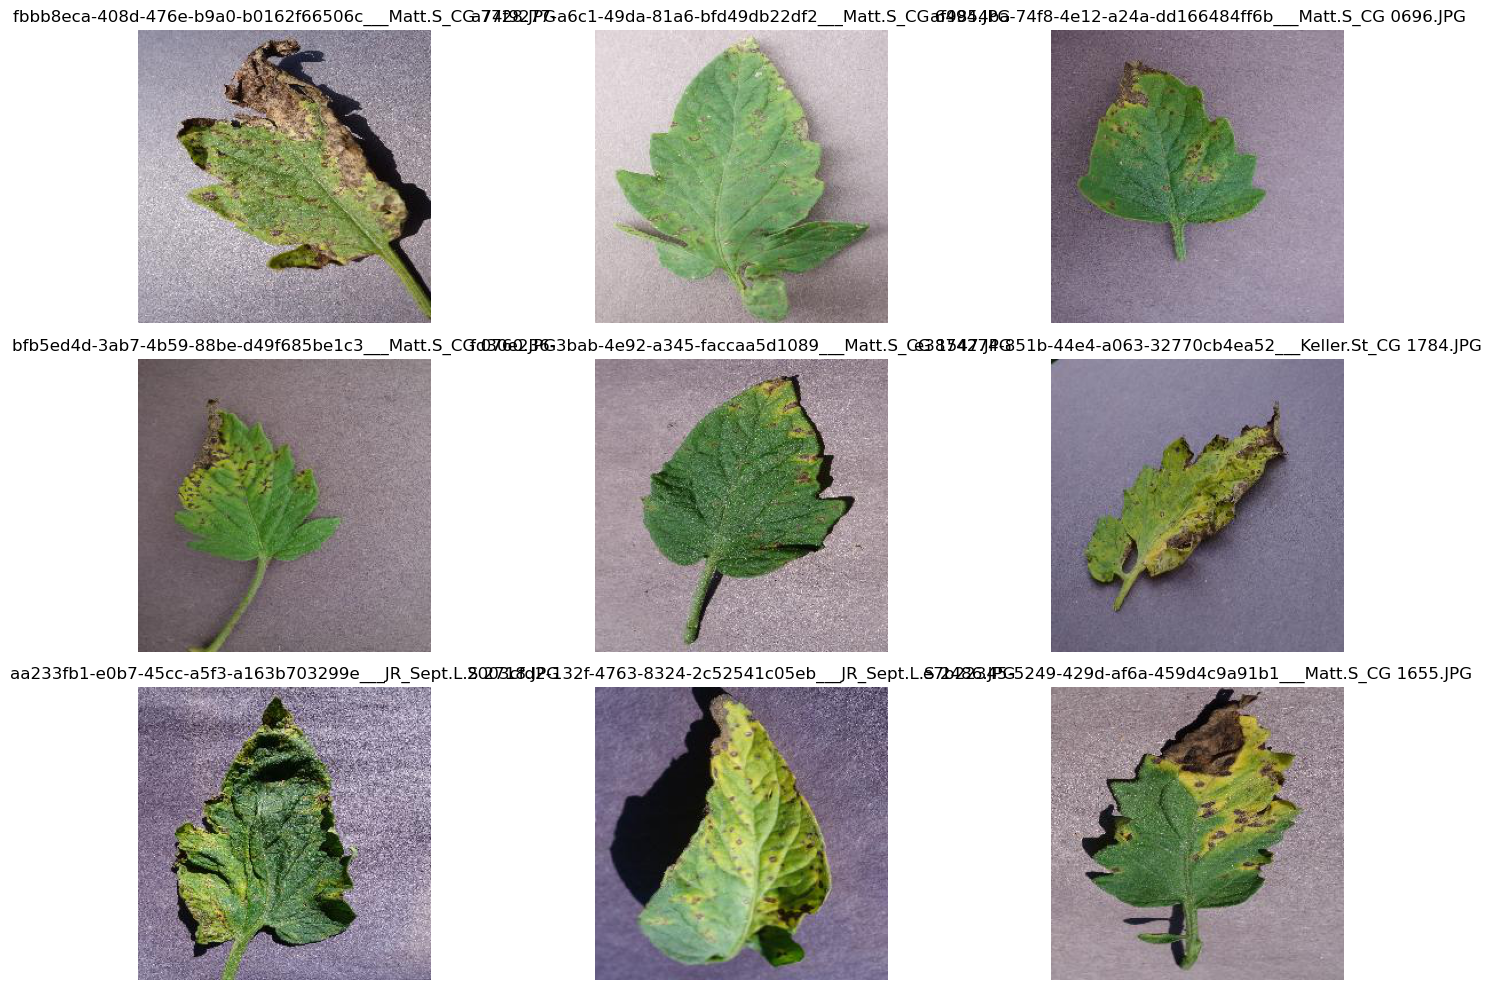

In [ ]:
display_random_images(train_path, num_images=9, num_columns=3)


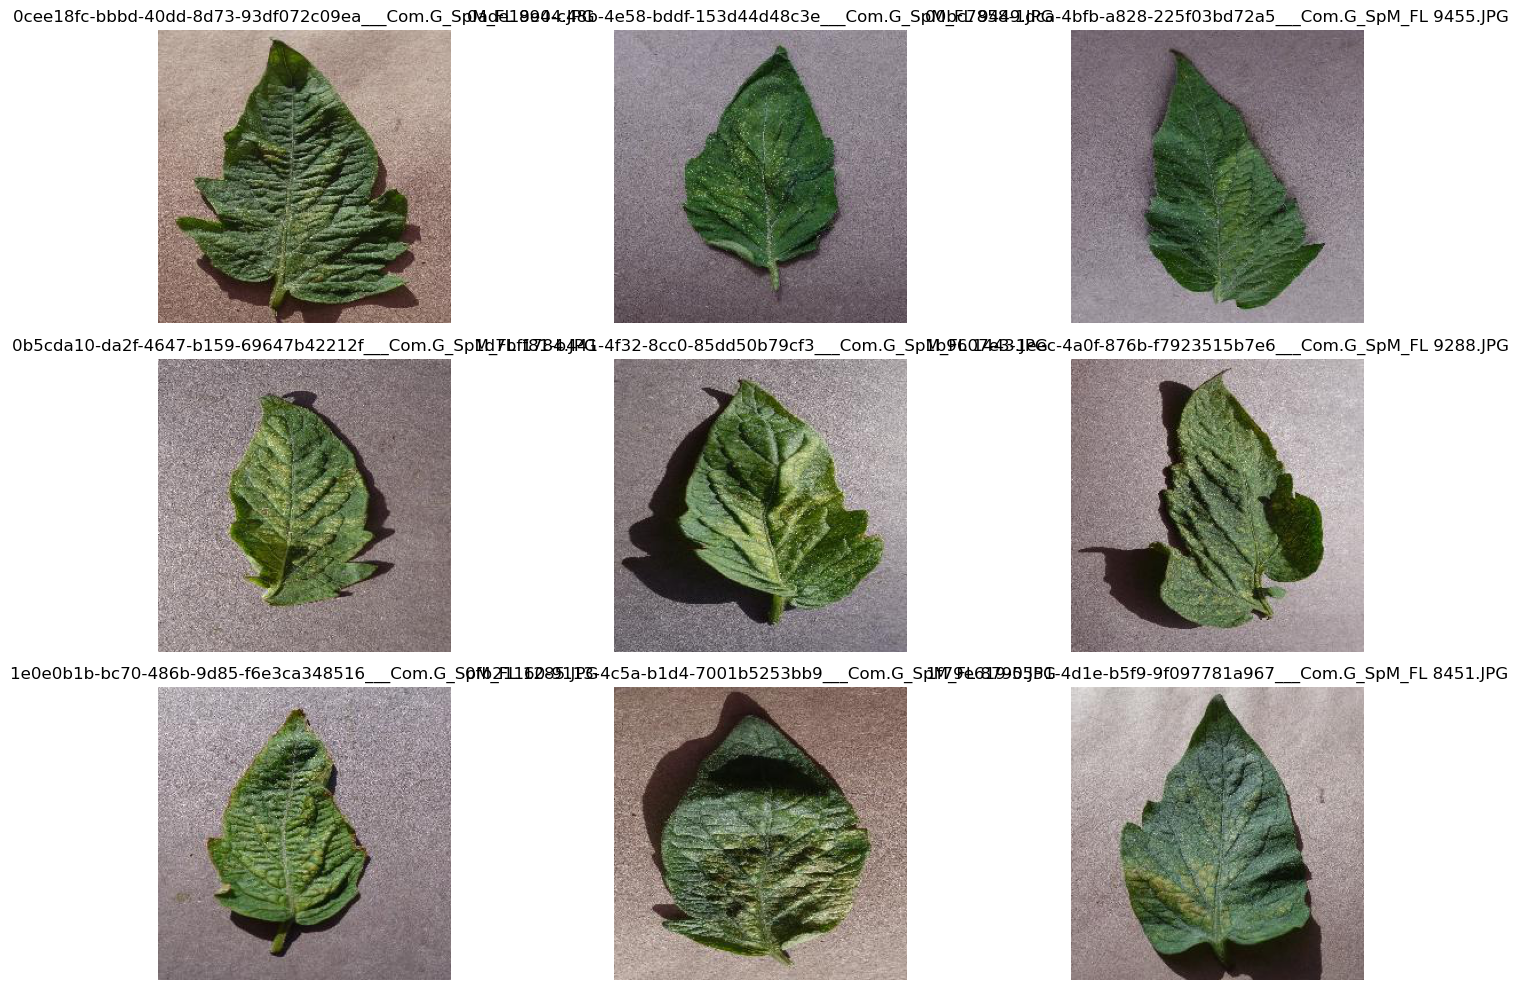

In [ ]:
display_random_images(valid_path, num_images=9, num_columns=3)

In [ ]:
num_classes = len(train_generator.class_indices)
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[early_stopping]
)

Epoch 1/50
313/313 [==============================] - 719s 2s/step - loss: 2.3095 - accuracy: 0.1051 - val_loss: 2.2826 - val_accuracy: 0.1380
Epoch 2/50
313/313 [==============================] - 858s 3s/step - loss: 2.2145 - accuracy: 0.1544 - val_loss: 2.1548 - val_accuracy: 0.1220
Epoch 3/50
313/313 [==============================] - 783s 2s/step - loss: 2.1307 - accuracy: 0.2105 - val_loss: 2.0259 - val_accuracy: 0.2230
Epoch 4/50
313/313 [==============================] - 511s 2s/step - loss: 2.0623 - accuracy: 0.2484 - val_loss: 1.9191 - val_accuracy: 0.2810
Epoch 5/50
313/313 [==============================] - 659s 2s/step - loss: 1.9814 - accuracy: 0.2705 - val_loss: 1.7838 - val_accuracy: 0.3570
Epoch 6/50
313/313 [==============================] - 472s 2s/step - loss: 1.8606 - accuracy: 0.3057 - val_loss: 1.5995 - val_accuracy: 0.3920
Epoch 7/50
313/313 [==============================] - 485s 2s/step - loss: 1.7854 - accuracy: 0.3293 - val_loss: 1.6172 - val_accuracy: 0.3710

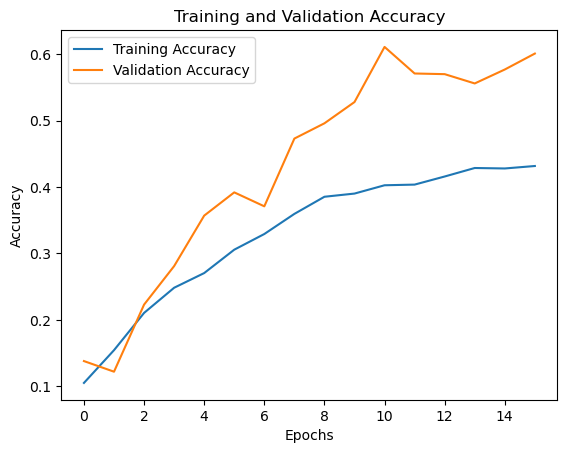

In [ ]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

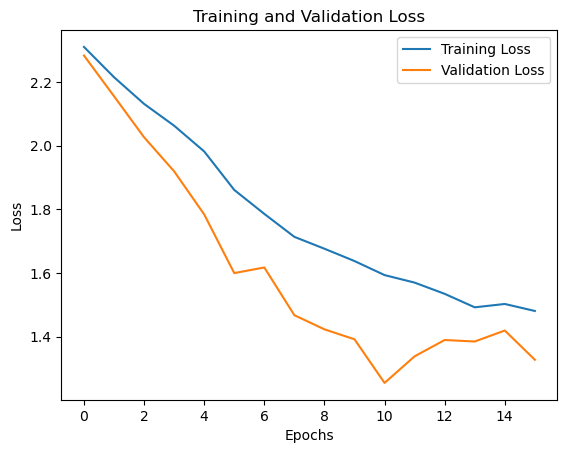

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

model.save("trained_model.h5")
print("Trained model saved as 'trained_model.h5'")

32/32 [==============================] - 10s 307ms/step - loss: 1.2548 - accuracy: 0.6110
Test Loss: 1.2548
Test Accuracy: 0.6110


C:\Users\91938\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Trained model saved as 'trained_model.h5'


1/1 [==============================] - 0s 153ms/step


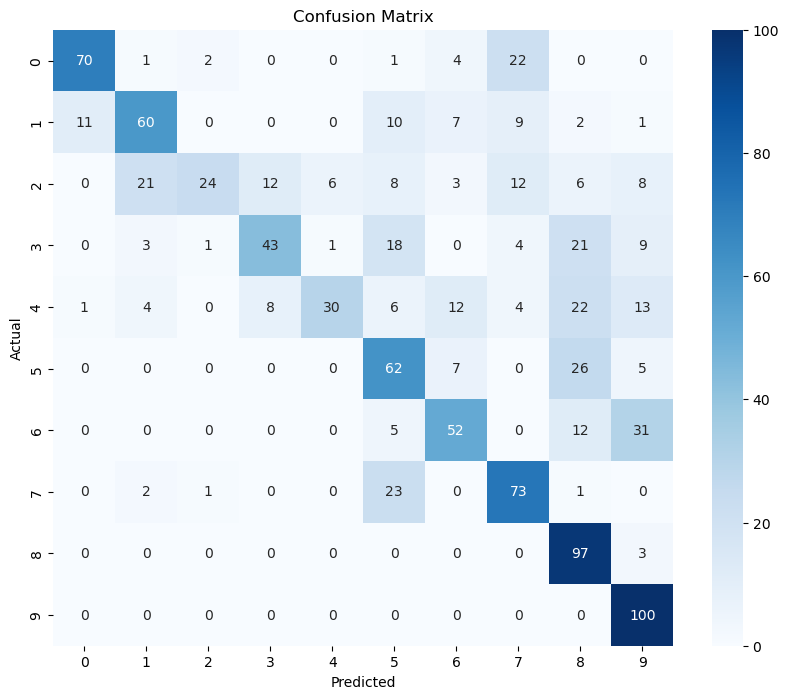

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

loaded_model = tf.keras.models.load_model("trained_model.h5")

num_samples = len(valid_generator.filenames)
batch_size = 32
num_batches = int(np.ceil(num_samples / batch_size))
all_test_labels = []
all_predicted_labels = []

for _ in range(num_batches):
    batch_images, batch_labels = next(valid_generator)
    batch_predictions = loaded_model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    all_test_labels.extend(np.argmax(batch_labels, axis=1))
    all_predicted_labels.extend(batch_predicted_labels)

cm = confusion_matrix(all_test_labels, all_predicted_labels)

class_names = [str(i) for i in range(num_classes)]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(all_test_labels, all_predicted_labels, average='weighted', zero_division=0)
recall = recall_score(all_test_labels, all_predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(all_test_labels, all_predicted_labels, average='weighted', zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.66
Recall: 0.61
F1-Score: 0.59
